In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
%matplotlib inline

In [2]:
town_closest_distances = pd.read_pickle("town_closest_distances.pkl")

In [3]:
town_closest_distances.head()

,Town,latitude,longitude,closest_solid_waste,closest_renewable_energy,closest_petroleum_release,closest_pollution_reports
0,Abingdon town,36.71,-81.97,0.294818,52.129728,0.042871,0.460100
1,Accomac town,37.72,-75.67,6.249408,1.550936,0.015395,0.058127
2,Adwolf,36.79,-81.59,5.154079,30.339459,0.433561,4.275153
3,Alberta town,36.86,-77.89,6.861292,19.785872,0.339769,13.516906
4,Alexandria city,38.82,-77.09,0.811872,25.651648,0.133541,0.811872


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(town_closest_distances[["closest_solid_waste", "closest_renewable_energy", "closest_petroleum_release", "closest_pollution_reports"]])
town_closest_distances["cluster"] = kmeans.labels_

In [5]:
town_closest_distances.head()

,Town,latitude,longitude,closest_solid_waste,closest_renewable_energy,closest_petroleum_release,closest_pollution_reports,cluster
0,Abingdon town,36.71,-81.97,0.294818,52.129728,0.042871,0.460100,1
1,Accomac town,37.72,-75.67,6.249408,1.550936,0.015395,0.058127,0
2,Adwolf,36.79,-81.59,5.154079,30.339459,0.433561,4.275153,1
3,Alberta town,36.86,-77.89,6.861292,19.785872,0.339769,13.516906,3
4,Alexandria city,38.82,-77.09,0.811872,25.651648,0.133541,0.811872,3


In [6]:
town_closest_distances["cluster"].value_counts()

3    264
0    228
1     68
4     20
2     11
Name: cluster, dtype: int64

In [8]:
town_closest_distances.groupby("cluster").mean()

,latitude,longitude,closest_solid_waste,closest_renewable_energy,closest_petroleum_release,closest_pollution_reports
cluster,,,,,,
0,37.744035,-77.642982,5.450285,8.201064,0.401547,2.938020
1,37.237206,-79.926471,4.106095,34.236377,0.361527,3.890191
2,36.761818,-82.998182,15.095581,99.256782,0.420498,12.374671
3,38.033295,-78.114167,4.301793,19.719832,0.381892,2.244525
4,36.951500,-82.370500,5.151241,73.680721,0.232808,2.708118


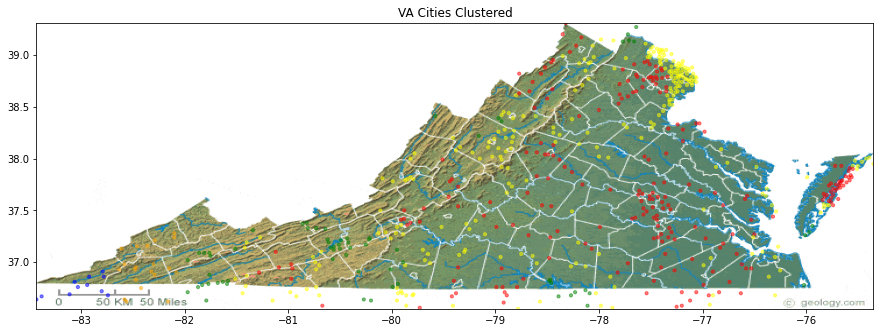

In [ ]:
ruh_m = plt.imread('virginia-physical-map.gif')
BBox = ((town_closest_distances.longitude.min(),   town_closest_distances.longitude.max(),      
         town_closest_distances.latitude.min(), town_closest_distances.latitude.max()))

colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'orange', 5:'purple'}


fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(town_closest_distances.longitude, town_closest_distances.latitude, zorder=1, alpha= 0.5, c=town_closest_distances['cluster'].map(colors), s=10)
ax.set_title('VA Cities Clustered')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
town_closest_distances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 591
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town                       591 non-null    object 
 1   latitude                   591 non-null    float64
 2   longitude                  591 non-null    float64
 3   closest_solid_waste        591 non-null    float64
 4   closest_renewable_energy   591 non-null    float64
 5   closest_petroleum_release  591 non-null    float64
 6   closest_pollution_reports  591 non-null    float64
 7   cluster                    591 non-null    int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 39.2+ KB


In [ ]:
town_closest_distances["cluster"] = town_closest_distances["cluster"].apply(lambda x : str(x))
town_closest_distances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 591
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town                       591 non-null    object 
 1   latitude                   591 non-null    float64
 2   longitude                  591 non-null    float64
 3   closest_solid_waste        591 non-null    float64
 4   closest_renewable_energy   591 non-null    float64
 5   closest_petroleum_release  591 non-null    float64
 6   closest_pollution_reports  591 non-null    float64
 7   cluster                    591 non-null    object 
dtypes: float64(6), object(2)
memory usage: 41.6+ KB


In [ ]:
import plotly.express as px
# import geopandas as gpd

# geo_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_geo(town_closest_distances,
                    lat=town_closest_distances["latitude"],
                    lon=town_closest_distances["longitude"],
                    color = town_closest_distances['cluster'],
                    hover_name="Town")
fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
)

fig.show()